In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
!jt -t chesterish

In [3]:
data = pd.read_csv('data/AK_CA_Burned_Plot_Data_1983_2016.csv')

In [4]:
data

,project_id,project_name,treatment,site,burn_name,burn_year,ecoregion_name_l2,latitude,longitude,accuracy_horizontal,...,temperature,relative_humidity,wind_speed,drought_code,drought_moisture_code,fine_fuel_moisture_code,initial_spread_index,buildup_index,fire_weather_index,daily_severity_rank
0,NWT_BCKE.sf.1,NWT_BCKE,burn,Jan-94,NaN,1994,Taiga Plains,61.5271,-117.2279,-9999.0,...,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.000,-9999.0000
1,NWT_BCKE.sf.2,NWT_BCKE,burn,Jan-94,1994,1994,Taiga Plains,61.5272,-117.2282,-9999.0,...,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.000,-9999.0000
2,NWT_BCKE.sf.3,NWT_BCKE,burn,Jan-94,1994,1994,Taiga Plains,61.5273,-117.2284,-9999.0,...,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.000,-9999.0000
3,NWT_BCKE.sf.4,NWT_BCKE,burn,Jan-94,1994,1994,Taiga Plains,61.5270,-117.2288,-9999.0,...,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.000,-9999.0000
4,NWT_BCKE.sf.5,NWT_BCKE,burn,Jan-94,1994,1994,Taiga Plains,61.5271,-117.2290,-9999.0,...,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.000,-9999.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167,NWT_BCKE.sf.321,NWT_BCKE,burn,ZF46-5,ZF46,2014,Taiga Plains,62.4809,-116.5036,-9999.0,...,27.17,36.56,10.97,310.32,42.73,91.01,8.61,63.58,22.607,6.7857
1168,NWT_BCKE.sf.322,NWT_BCKE,burn,ZF46-5,ZF46,2014,Taiga Plains,62.4810,-116.5041,-9999.0,...,27.17,36.56,10.97,310.32,42.73,91.01,8.61,63.58,22.607,6.7857
1169,NWT_BCKE.sf.323,NWT_BCKE,burn,ZF46-5,ZF46,2014,Taiga Plains,62.4814,-116.5027,-9999.0,...,27.17,36.56,10.97,310.32,42.73,91.01,8.61,63.58,22.607,6.7857
1170,NWT_BCKE.sf.324,NWT_BCKE,burn,ZF46-5,ZF46,2014,Taiga Plains,62.4814,-116.5034,-9999.0,...,27.17,36.56,10.97,310.32,42.73,91.01,8.61,63.58,22.607,6.7857


In [5]:
data['burn_year'].value_counts()

2014        428
2004        247
2015        123
unburned    113
2003         69
Control      40
2016         28
2010         25
2005         17
1994         13
1990          9
1972          9
1999          8
2008          6
1971          6
1996          5
2013          4
1966          4
1987          4
1993          3
1967          2
1969          2
2002          2
1991          1
1998          1
1983          1
1980          1
2011          1
Name: burn_year, dtype: int64

Taking year 2014

In [6]:
data14 = data.loc[data['burn_year'] == '2014']

In [7]:
#data14 = data14.loc[data14['ecoregion_name_l2'] == 'Taiga Plains']

In [8]:
data14 = data14.drop(['project_id', 'project_name', 'site','burn_name','burn_year','ecoregion_name_l2',
                      'latitude','longitude','accuracy_horizontal','elevation','accuracy_vertical', 
                      'aspect','stand_density','stand_basal_area','prop_black_spruce','stand_age',
                      'stand_origin','ag_biomass_prefire','ag_c_prefire','ag_biomass_combusted',
                      'ag_c_combusted','prefire_sol','mean_residual_org_layer_depth','burn_depth',
                      'prop_sol_combusted','residual_sol_c','bg_c_prefire','bg_c_combusted',
                      'prop_sol_c_combusted','total_c_pool_prefire','prop_prefire_bg_c', 'slope',
                      'total_c_combusted','prop_total_bg_c_combusted','prop_total_prefire_c_combusted', 
                      'drought_code', 'drought_moisture_code', 'fine_fuel_moisture_code', 'moisture',
                      'initial_spread_index', 'buildup_index', 'fire_weather_index','daily_severity_rank'], axis=1)

In [9]:
data14 = data14.rename(columns={"relative_humidity": "humidity"})

In [10]:
data14.columns

Index(['treatment', 'dob', 'precipitation', 'temperature', 'humidity',
       'wind_speed'],
      dtype='object')

In [11]:
data14['dob'] = data14['dob'].apply(np.floor)

In [12]:
data14 = data14[data14.dob != -9999. ]
data14 = data14[data14.dob != 0]

In [13]:
data14.dob.value_counts()

189.0    39
194.0    35
200.0    33
205.0    31
193.0    30
195.0    26
182.0    23
211.0    23
183.0    20
206.0    16
196.0    16
213.0    16
197.0    12
254.0    11
202.0    11
192.0    11
198.0     9
204.0     8
225.0     7
215.0     7
188.0     6
177.0     6
236.0     4
217.0     4
179.0     4
216.0     3
207.0     3
214.0     3
201.0     3
210.0     3
203.0     2
223.0     1
178.0     1
Name: dob, dtype: int64

In [14]:
data14[data14['dob'] == 182]

,treatment,dob,precipitation,temperature,humidity,wind_speed
568,burn,182.0,0.879,24.9,44.6,4.93
569,burn,182.0,0.879,24.9,44.6,4.93
587,burn,182.0,0.879,24.9,44.6,4.93
588,burn,182.0,0.879,24.9,44.6,4.93
589,burn,182.0,0.879,24.9,44.6,4.93
592,burn,182.0,0.879,24.9,44.6,4.93
903,burn,182.0,0.879,24.9,44.6,4.93
904,burn,182.0,0.879,24.9,44.6,4.93
905,burn,182.0,0.879,24.9,44.6,4.93
906,burn,182.0,0.879,24.9,44.6,4.93


In [15]:
data14 = data14.groupby('dob', as_index=False, sort=True)[['treatment', 'precipitation', 'temperature',
                                                 'humidity', 'wind_speed']].median()

C:\Users\David_Cheung\AppData\Local\Temp\ipykernel_36732\3661837809.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  'humidity', 'wind_speed']].median()


In [16]:
data14 = data14.rename(columns={'wind_speed' : 'windspeed'})

In [17]:
data14['burn'] = '1'

In [18]:
data14['precipitation'] = data14['precipitation'].round(3)

In [19]:
data14

,dob,precipitation,temperature,humidity,windspeed,burn
0,177.0,1.130,24.53,28.21,11.28,1
1,178.0,0.000,27.68,24.73,2.92,1
2,179.0,0.016,27.56,30.24,5.06,1
3,182.0,0.879,24.90,44.60,4.93,1
4,183.0,0.326,28.47,32.26,8.19,1
5,188.0,0.629,21.40,50.58,1.15,1
6,189.0,0.188,24.63,51.23,6.14,1
7,192.0,0.673,13.33,45.29,18.29,1
8,193.0,0.009,15.65,37.53,17.55,1
9,194.0,0.008,28.40,40.09,9.37,1


Taking 2015 of the dataset -------------------------------------------------------------------

In [20]:
data15 = data.loc[data['burn_year'] == '2015']

In [21]:
data15 = data15.drop(['project_id', 'project_name', 'site','burn_name','burn_year','ecoregion_name_l2',
                      'latitude','longitude','accuracy_horizontal','elevation','accuracy_vertical', 
                      'aspect','stand_density','stand_basal_area','prop_black_spruce','stand_age',
                      'stand_origin','ag_biomass_prefire','ag_c_prefire','ag_biomass_combusted',
                      'ag_c_combusted','prefire_sol','mean_residual_org_layer_depth','burn_depth',
                      'prop_sol_combusted','residual_sol_c','bg_c_prefire','bg_c_combusted',
                      'prop_sol_c_combusted','total_c_pool_prefire','prop_prefire_bg_c', 'slope',
                      'total_c_combusted','prop_total_bg_c_combusted','prop_total_prefire_c_combusted', 
                      'drought_code', 'drought_moisture_code', 'fine_fuel_moisture_code', 'moisture',
                      'initial_spread_index', 'buildup_index', 'fire_weather_index','daily_severity_rank'], axis=1)

In [22]:
data15 = data15.rename(columns={"relative_humidity": "humidity"})

In [23]:
data15.columns

Index(['treatment', 'dob', 'precipitation', 'temperature', 'humidity',
       'wind_speed'],
      dtype='object')

In [24]:
data15['dob'] = data15['dob'].apply(np.floor)

In [25]:
data15 = data15[data15.dob != -9999. ]
data15 = data15[data15.dob != 0]

In [26]:
data15.dob.unique()

array([187., 157., 193., 183., 180., 184., 179., 178., 181., 158., 194.,
       186., 191., 190., 223., 225., 219., 185., 218., 221.])

In [27]:
data15 = data15.groupby('dob', as_index=False, sort=True)[['treatment', 'precipitation', 'temperature',
                                                 'humidity', 'wind_speed']].median()

C:\Users\David_Cheung\AppData\Local\Temp\ipykernel_36732\1272336934.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  'humidity', 'wind_speed']].median()


In [28]:
data15 = data15.rename(columns={'wind_speed' : 'windspeed'})

In [29]:
data15['burn'] = '1'

In [30]:
data15['precipitation'] = data15['precipitation'].round(3)

In [31]:
data15

,dob,precipitation,temperature,humidity,windspeed,burn
0,157.0,0.127,25.48,38.22,7.700,1
1,158.0,0.616,23.04,44.42,11.710,1
2,178.0,0.091,26.31,35.58,14.900,1
3,179.0,0.000,26.07,38.02,11.300,1
4,180.0,0.014,24.55,39.24,5.750,1
5,181.0,0.000,23.13,46.35,3.480,1
6,183.0,1.460,23.81,52.54,11.300,1
7,184.0,0.001,27.12,40.15,10.780,1
8,185.0,2.180,20.31,40.96,22.110,1
9,186.0,1.330,12.05,62.26,16.600,1


Below is the data preprocessing of the weather data in 2014

In [32]:
weatherdata14 = pd.read_csv('data/taigaweather2014.csv')

In [33]:
weatherdata14['dob'] = np.arange(len(weatherdata14))
weatherdata14['dob']

0        0
1        1
2        2
3        3
4        4
      ... 
360    360
361    361
362    362
363    363
364    364
Name: dob, Length: 365, dtype: int32

In [34]:
def inc(value):
    return value + 1
weatherdata14['dob'] = weatherdata14['dob'].apply(inc)

In [35]:
weatherdata14 = weatherdata14.drop(['name', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'precipprob', 'precipcover', 'preciptype', 'windgust', 'winddir', 'sealevelpressure','cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise', 'snowdepth',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'], axis=1)

In [36]:
weatherdata14.columns

Index(['datetime', 'tempmax', 'humidity', 'precip', 'snow', 'windspeed',
       'dob'],
      dtype='object')

In [37]:
weatherdata14 = weatherdata14.rename(columns={"tempmax": "temperature", "precip": "precipitation"})

In [38]:
weatherdata14.columns

Index(['datetime', 'temperature', 'humidity', 'precipitation', 'snow',
       'windspeed', 'dob'],
      dtype='object')

In [39]:
weatherdata14

,datetime,temperature,humidity,precipitation,snow,windspeed,dob
0,2014-01-01,-33.0,65.4,0.0,0.0,12.9,1
1,2014-01-02,-23.9,75.8,0.0,0.0,29.4,2
2,2014-01-03,-28.0,69.2,0.0,0.0,31.6,3
3,2014-01-04,-30.9,67.8,0.0,25.0,22.4,4
4,2014-01-05,-35.9,65.4,0.0,0.0,12.9,5
...,...,...,...,...,...,...,...
360,2014-12-27,-24.9,70.5,0.0,0.0,14.8,361
361,2014-12-28,-19.9,78.1,0.0,0.0,18.4,362
362,2014-12-29,-19.0,73.7,0.0,0.0,25.9,363
363,2014-12-30,-10.9,84.7,0.0,0.0,31.7,364


Below is the data preprocessing of the weather data in 2014

In [40]:
weatherdata15 = pd.read_csv('data/taigaweather2015.csv')

In [41]:
weatherdata15['dob'] = np.arange(len(weatherdata15))
weatherdata15['dob']

0        0
1        1
2        2
3        3
4        4
      ... 
360    360
361    361
362    362
363    363
364    364
Name: dob, Length: 365, dtype: int32

In [42]:
def inc(value):
    return value + 1
weatherdata15['dob'] = weatherdata15['dob'].apply(inc)

In [43]:
weatherdata15 = weatherdata15.drop(['name', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'precipprob', 'precipcover', 'preciptype', 'windgust', 'winddir', 'sealevelpressure','cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise', 'snowdepth',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'], axis=1)

In [44]:
weatherdata15.columns

Index(['datetime', 'tempmax', 'humidity', 'precip', 'snow', 'windspeed',
       'dob'],
      dtype='object')

In [45]:
weatherdata15 = weatherdata15.rename(columns={"tempmax": "temperature", "precip": "precipitation"})

In [46]:
weatherdata15.columns

Index(['datetime', 'temperature', 'humidity', 'precipitation', 'snow',
       'windspeed', 'dob'],
      dtype='object')

In [47]:
weatherdata15

,datetime,temperature,humidity,precipitation,snow,windspeed,dob
0,2015-01-01,-27.9,71.2,0.0,0.0,29.5,1
1,2015-01-02,-22.9,71.4,0.0,0.0,22.3,2
2,2015-01-03,-20.9,75.1,0.0,0.0,20.5,3
3,2015-01-04,-18.0,77.1,0.0,0.0,20.5,4
4,2015-01-05,-23.9,71.8,0.0,0.0,20.5,5
...,...,...,...,...,...,...,...
360,2015-12-27,-32.0,65.5,0.0,0.0,16.6,361
361,2015-12-28,-28.0,69.0,0.0,0.0,14.8,362
362,2015-12-29,-18.0,78.2,0.0,0.0,18.4,363
363,2015-12-30,-12.0,86.9,0.0,0.0,20.5,364


Below is the merging of the 2 dataframes of 2014

In [48]:
final14 = pd.merge(data14, weatherdata14, how='outer', on='dob')

In [49]:
final14

,dob,precipitation_x,temperature_x,humidity_x,windspeed_x,burn,datetime,temperature_y,humidity_y,precipitation_y,snow,windspeed_y
0,177.0,1.130,24.53,28.21,11.28,1,2014-06-26,25.1,58.4,0.0,0.0,20.5
1,178.0,0.000,27.68,24.73,2.92,1,2014-06-27,23.1,56.0,0.0,0.0,20.4
2,179.0,0.016,27.56,30.24,5.06,1,2014-06-28,17.1,81.7,0.0,0.0,24.0
3,182.0,0.879,24.90,44.60,4.93,1,2014-07-01,25.1,53.3,0.0,0.0,14.7
4,183.0,0.326,28.47,32.26,8.19,1,2014-07-02,26.1,51.6,0.0,0.0,16.5
...,...,...,...,...,...,...,...,...,...,...,...,...
360,361.0,NaN,NaN,NaN,NaN,NaN,2014-12-27,-24.9,70.5,0.0,0.0,14.8
361,362.0,NaN,NaN,NaN,NaN,NaN,2014-12-28,-19.9,78.1,0.0,0.0,18.4
362,363.0,NaN,NaN,NaN,NaN,NaN,2014-12-29,-19.0,73.7,0.0,0.0,25.9
363,364.0,NaN,NaN,NaN,NaN,NaN,2014-12-30,-10.9,84.7,0.0,0.0,31.7


In [50]:
final14['burn'] = final14['burn'].fillna(0)

In [51]:
final14['temperature'] = final14[['temperature_x', 'temperature_y']].mean(axis=1)
final14['precipitation'] = final14[['precipitation_x', 'precipitation_y']].mean(axis=1)
final14['humidity'] = final14[['humidity_x', 'humidity_y']].mean(axis=1)
final14['windspeed'] = final14[['windspeed_x', 'windspeed_y']].mean(axis=1)

In [52]:
final14

,dob,precipitation_x,temperature_x,humidity_x,windspeed_x,burn,datetime,temperature_y,humidity_y,precipitation_y,snow,windspeed_y,temperature,precipitation,humidity,windspeed
0,177.0,1.130,24.53,28.21,11.28,1,2014-06-26,25.1,58.4,0.0,0.0,20.5,24.815,0.5650,43.305,15.890
1,178.0,0.000,27.68,24.73,2.92,1,2014-06-27,23.1,56.0,0.0,0.0,20.4,25.390,0.0000,40.365,11.660
2,179.0,0.016,27.56,30.24,5.06,1,2014-06-28,17.1,81.7,0.0,0.0,24.0,22.330,0.0080,55.970,14.530
3,182.0,0.879,24.90,44.60,4.93,1,2014-07-01,25.1,53.3,0.0,0.0,14.7,25.000,0.4395,48.950,9.815
4,183.0,0.326,28.47,32.26,8.19,1,2014-07-02,26.1,51.6,0.0,0.0,16.5,27.285,0.1630,41.930,12.345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,361.0,NaN,NaN,NaN,NaN,0,2014-12-27,-24.9,70.5,0.0,0.0,14.8,-24.900,0.0000,70.500,14.800
361,362.0,NaN,NaN,NaN,NaN,0,2014-12-28,-19.9,78.1,0.0,0.0,18.4,-19.900,0.0000,78.100,18.400
362,363.0,NaN,NaN,NaN,NaN,0,2014-12-29,-19.0,73.7,0.0,0.0,25.9,-19.000,0.0000,73.700,25.900
363,364.0,NaN,NaN,NaN,NaN,0,2014-12-30,-10.9,84.7,0.0,0.0,31.7,-10.900,0.0000,84.700,31.700


In [53]:
final14.columns

Index(['dob', 'precipitation_x', 'temperature_x', 'humidity_x', 'windspeed_x',
       'burn', 'datetime', 'temperature_y', 'humidity_y', 'precipitation_y',
       'snow', 'windspeed_y', 'temperature', 'precipitation', 'humidity',
       'windspeed'],
      dtype='object')

In [54]:
final14 = final14.drop(['precipitation_x', 'temperature_x', 'humidity_x', 'windspeed_x','temperature_y',
              'humidity_y', 'precipitation_y','windspeed_y'], axis=1)

In [55]:
final14 = final14.sort_values(by=['dob'])

In [56]:
final14 = final14[['dob', 'datetime','temperature', 'humidity', 'precipitation', 'snow', 'windspeed', 'burn']]

In [57]:
final14 = final14.reset_index(drop=True)

In [58]:
final14['weekday'] = 0

In [59]:
final14

,dob,datetime,temperature,humidity,precipitation,snow,windspeed,burn,weekday
0,1.0,2014-01-01,-33.0,65.4,0.0,0.0,12.9,0,0
1,2.0,2014-01-02,-23.9,75.8,0.0,0.0,29.4,0,0
2,3.0,2014-01-03,-28.0,69.2,0.0,0.0,31.6,0,0
3,4.0,2014-01-04,-30.9,67.8,0.0,25.0,22.4,0,0
4,5.0,2014-01-05,-35.9,65.4,0.0,0.0,12.9,0,0
...,...,...,...,...,...,...,...,...,...
360,361.0,2014-12-27,-24.9,70.5,0.0,0.0,14.8,0,0
361,362.0,2014-12-28,-19.9,78.1,0.0,0.0,18.4,0,0
362,363.0,2014-12-29,-19.0,73.7,0.0,0.0,25.9,0,0
363,364.0,2014-12-30,-10.9,84.7,0.0,0.0,31.7,0,0


Below is the merging of the 2 dataframes of 2015

In [60]:
final15 = pd.merge(data15, weatherdata15, how='outer', on='dob')

In [61]:
final15

,dob,precipitation_x,temperature_x,humidity_x,windspeed_x,burn,datetime,temperature_y,humidity_y,precipitation_y,snow,windspeed_y
0,157.0,0.127,25.48,38.22,7.70,1,2015-06-06,22.1,53.3,0.0,0.0,31.7
1,158.0,0.616,23.04,44.42,11.71,1,2015-06-07,18.1,53.0,0.0,0.0,25.9
2,178.0,0.091,26.31,35.58,14.90,1,2015-06-27,23.1,73.1,0.0,0.0,20.5
3,179.0,0.000,26.07,38.02,11.30,1,2015-06-28,22.1,69.1,0.0,0.0,29.5
4,180.0,0.014,24.55,39.24,5.75,1,2015-06-29,23.1,56.0,0.0,0.0,14.8
...,...,...,...,...,...,...,...,...,...,...,...,...
360,361.0,NaN,NaN,NaN,NaN,NaN,2015-12-27,-32.0,65.5,0.0,0.0,16.6
361,362.0,NaN,NaN,NaN,NaN,NaN,2015-12-28,-28.0,69.0,0.0,0.0,14.8
362,363.0,NaN,NaN,NaN,NaN,NaN,2015-12-29,-18.0,78.2,0.0,0.0,18.4
363,364.0,NaN,NaN,NaN,NaN,NaN,2015-12-30,-12.0,86.9,0.0,0.0,20.5


In [62]:
final15['burn'] = final15['burn'].fillna(0)

In [63]:
final15['temperature'] = final15[['temperature_x', 'temperature_y']].mean(axis=1)
final15['precipitation'] = final15[['precipitation_x', 'precipitation_y']].mean(axis=1)
final15['humidity'] = final15[['humidity_x', 'humidity_y']].mean(axis=1)
final15['windspeed'] = final15[['windspeed_x', 'windspeed_y']].mean(axis=1)

In [64]:
final15

,dob,precipitation_x,temperature_x,humidity_x,windspeed_x,burn,datetime,temperature_y,humidity_y,precipitation_y,snow,windspeed_y,temperature,precipitation,humidity,windspeed
0,157.0,0.127,25.48,38.22,7.70,1,2015-06-06,22.1,53.3,0.0,0.0,31.7,23.790,0.0635,45.76,19.700
1,158.0,0.616,23.04,44.42,11.71,1,2015-06-07,18.1,53.0,0.0,0.0,25.9,20.570,0.3080,48.71,18.805
2,178.0,0.091,26.31,35.58,14.90,1,2015-06-27,23.1,73.1,0.0,0.0,20.5,24.705,0.0455,54.34,17.700
3,179.0,0.000,26.07,38.02,11.30,1,2015-06-28,22.1,69.1,0.0,0.0,29.5,24.085,0.0000,53.56,20.400
4,180.0,0.014,24.55,39.24,5.75,1,2015-06-29,23.1,56.0,0.0,0.0,14.8,23.825,0.0070,47.62,10.275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,361.0,NaN,NaN,NaN,NaN,0,2015-12-27,-32.0,65.5,0.0,0.0,16.6,-32.000,0.0000,65.50,16.600
361,362.0,NaN,NaN,NaN,NaN,0,2015-12-28,-28.0,69.0,0.0,0.0,14.8,-28.000,0.0000,69.00,14.800
362,363.0,NaN,NaN,NaN,NaN,0,2015-12-29,-18.0,78.2,0.0,0.0,18.4,-18.000,0.0000,78.20,18.400
363,364.0,NaN,NaN,NaN,NaN,0,2015-12-30,-12.0,86.9,0.0,0.0,20.5,-12.000,0.0000,86.90,20.500


In [65]:
final15.columns

Index(['dob', 'precipitation_x', 'temperature_x', 'humidity_x', 'windspeed_x',
       'burn', 'datetime', 'temperature_y', 'humidity_y', 'precipitation_y',
       'snow', 'windspeed_y', 'temperature', 'precipitation', 'humidity',
       'windspeed'],
      dtype='object')

In [66]:
final15 = final15.drop(['precipitation_x', 'temperature_x', 'humidity_x', 'windspeed_x','temperature_y',
              'humidity_y', 'precipitation_y','windspeed_y'], axis=1)

In [67]:
final15 = final15.sort_values(by=['dob'])

In [68]:
final15 = final15[['dob', 'datetime','temperature', 'humidity', 'precipitation', 'snow', 'windspeed', 'burn']]

In [69]:
final15 = final15.reset_index(drop=True)

In [70]:
final15['weekday'] = 0

In [71]:
final15

,dob,datetime,temperature,humidity,precipitation,snow,windspeed,burn,weekday
0,1.0,2015-01-01,-27.9,71.2,0.0,0.0,29.5,0,0
1,2.0,2015-01-02,-22.9,71.4,0.0,0.0,22.3,0,0
2,3.0,2015-01-03,-20.9,75.1,0.0,0.0,20.5,0,0
3,4.0,2015-01-04,-18.0,77.1,0.0,0.0,20.5,0,0
4,5.0,2015-01-05,-23.9,71.8,0.0,0.0,20.5,0,0
...,...,...,...,...,...,...,...,...,...
360,361.0,2015-12-27,-32.0,65.5,0.0,0.0,16.6,0,0
361,362.0,2015-12-28,-28.0,69.0,0.0,0.0,14.8,0,0
362,363.0,2015-12-29,-18.0,78.2,0.0,0.0,18.4,0,0
363,364.0,2015-12-30,-12.0,86.9,0.0,0.0,20.5,0,0


Merging 2014 and 2015

In [72]:
data = pd.concat([final14, final15], ignore_index=True)

In [73]:
data

,dob,datetime,temperature,humidity,precipitation,snow,windspeed,burn,weekday
0,1.0,2014-01-01,-33.0,65.4,0.0,0.0,12.9,0,0
1,2.0,2014-01-02,-23.9,75.8,0.0,0.0,29.4,0,0
2,3.0,2014-01-03,-28.0,69.2,0.0,0.0,31.6,0,0
3,4.0,2014-01-04,-30.9,67.8,0.0,25.0,22.4,0,0
4,5.0,2014-01-05,-35.9,65.4,0.0,0.0,12.9,0,0
...,...,...,...,...,...,...,...,...,...
725,361.0,2015-12-27,-32.0,65.5,0.0,0.0,16.6,0,0
726,362.0,2015-12-28,-28.0,69.0,0.0,0.0,14.8,0,0
727,363.0,2015-12-29,-18.0,78.2,0.0,0.0,18.4,0,0
728,364.0,2015-12-30,-12.0,86.9,0.0,0.0,20.5,0,0


In [74]:
data['datetime'] = data[['datetime']].apply(pd.to_datetime)

In [75]:
data['month'] = data['datetime'].dt.month_name()

In [76]:
data['weekday'] = data['datetime'].dt.day_name()

In [77]:
data['weeknumber'] = data['datetime'].dt.isocalendar().week

In [78]:
data['burn'].value_counts()

0    677
1     53
Name: burn, dtype: int64

In [79]:
data.month

0       January
1       January
2       January
3       January
4       January
         ...   
725    December
726    December
727    December
728    December
729    December
Name: month, Length: 730, dtype: object

In [80]:
data

,dob,datetime,temperature,humidity,precipitation,snow,windspeed,burn,weekday,month,weeknumber
0,1.0,2014-01-01,-33.0,65.4,0.0,0.0,12.9,0,Wednesday,January,1
1,2.0,2014-01-02,-23.9,75.8,0.0,0.0,29.4,0,Thursday,January,1
2,3.0,2014-01-03,-28.0,69.2,0.0,0.0,31.6,0,Friday,January,1
3,4.0,2014-01-04,-30.9,67.8,0.0,25.0,22.4,0,Saturday,January,1
4,5.0,2014-01-05,-35.9,65.4,0.0,0.0,12.9,0,Sunday,January,1
...,...,...,...,...,...,...,...,...,...,...,...
725,361.0,2015-12-27,-32.0,65.5,0.0,0.0,16.6,0,Sunday,December,52
726,362.0,2015-12-28,-28.0,69.0,0.0,0.0,14.8,0,Monday,December,53
727,363.0,2015-12-29,-18.0,78.2,0.0,0.0,18.4,0,Tuesday,December,53
728,364.0,2015-12-30,-12.0,86.9,0.0,0.0,20.5,0,Wednesday,December,53


Preprocess data again to deal with categorical columns

In [81]:
weekdaydummy = pd.get_dummies(data.weekday)

In [82]:
data = pd.concat([data, weekdaydummy], axis=1)

In [83]:
data.drop('weekday', axis= 1)

,dob,datetime,temperature,humidity,precipitation,snow,windspeed,burn,month,weeknumber,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1.0,2014-01-01,-33.0,65.4,0.0,0.0,12.9,0,January,1,0,0,0,0,0,0,1
1,2.0,2014-01-02,-23.9,75.8,0.0,0.0,29.4,0,January,1,0,0,0,0,1,0,0
2,3.0,2014-01-03,-28.0,69.2,0.0,0.0,31.6,0,January,1,1,0,0,0,0,0,0
3,4.0,2014-01-04,-30.9,67.8,0.0,25.0,22.4,0,January,1,0,0,1,0,0,0,0
4,5.0,2014-01-05,-35.9,65.4,0.0,0.0,12.9,0,January,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,361.0,2015-12-27,-32.0,65.5,0.0,0.0,16.6,0,December,52,0,0,0,1,0,0,0
726,362.0,2015-12-28,-28.0,69.0,0.0,0.0,14.8,0,December,53,0,1,0,0,0,0,0
727,363.0,2015-12-29,-18.0,78.2,0.0,0.0,18.4,0,December,53,0,0,0,0,0,1,0
728,364.0,2015-12-30,-12.0,86.9,0.0,0.0,20.5,0,December,53,0,0,0,0,0,0,1


In [84]:
monthdummy = pd.get_dummies(data.month)

In [85]:
data = pd.concat([data, monthdummy], axis=1)

In [86]:
data = data.drop(['month', 'weekday', 'datetime', 'weeknumber'], axis= 1)

In [87]:
data.columns

Index(['dob', 'temperature', 'humidity', 'precipitation', 'snow', 'windspeed',
       'burn', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'April', 'August', 'December', 'February', 'January',
       'July', 'June', 'March', 'May', 'November', 'October', 'September'],
      dtype='object')

In [88]:
data.tail(10)

,dob,temperature,humidity,precipitation,snow,windspeed,burn,Friday,Monday,Saturday,...,December,February,January,July,June,March,May,November,October,September
720,356.0,-20.0,78.7,0.0,0.0,13.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
721,357.0,-21.0,78.2,0.0,0.0,14.8,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
722,358.0,-27.0,73.1,0.0,0.0,14.8,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
723,359.0,-29.0,70.1,0.0,0.0,13.0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
724,360.0,-36.0,59.6,0.0,0.0,11.2,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
725,361.0,-32.0,65.5,0.0,0.0,16.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
726,362.0,-28.0,69.0,0.0,0.0,14.8,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
727,363.0,-18.0,78.2,0.0,0.0,18.4,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
728,364.0,-12.0,86.9,0.0,0.0,20.5,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
729,365.0,-7.0,89.7,0.0,0.0,25.9,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


Splitting features and targets

In [89]:
y = data['burn']

In [90]:
X = data.drop('burn', axis = 1)

In [91]:
X

,dob,temperature,humidity,precipitation,snow,windspeed,Friday,Monday,Saturday,Sunday,...,December,February,January,July,June,March,May,November,October,September
0,1.0,-33.0,65.4,0.0,0.0,12.9,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2.0,-23.9,75.8,0.0,0.0,29.4,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3.0,-28.0,69.2,0.0,0.0,31.6,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,4.0,-30.9,67.8,0.0,25.0,22.4,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,5.0,-35.9,65.4,0.0,0.0,12.9,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,361.0,-32.0,65.5,0.0,0.0,16.6,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
726,362.0,-28.0,69.0,0.0,0.0,14.8,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
727,363.0,-18.0,78.2,0.0,0.0,18.4,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
728,364.0,-12.0,86.9,0.0,0.0,20.5,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [92]:
y=y.astype('int')

In [93]:
y.value_counts()

0    677
1     53
Name: burn, dtype: int64

In [94]:
dataList = list(X.columns)

In [95]:
dataList

['dob',
 'temperature',
 'humidity',
 'precipitation',
 'snow',
 'windspeed',
 'Friday',
 'Monday',
 'Saturday',
 'Sunday',
 'Thursday',
 'Tuesday',
 'Wednesday',
 'April',
 'August',
 'December',
 'February',
 'January',
 'July',
 'June',
 'March',
 'May',
 'November',
 'October',
 'September']

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Using Random Forest here

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [99]:
rf1 = RandomForestClassifier(n_estimators = 250, max_depth=1)
rf3 = RandomForestClassifier(n_estimators = 250, max_depth=3)
rf5 = RandomForestClassifier(n_estimators = 250, max_depth=5)
rf7 = RandomForestClassifier(n_estimators = 250, max_depth=7)

Hyperparameter tuning

In [100]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [250, 300, 350, 400, 450, 500, 550]
}

rfHypertune = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfHypertune, param_grid = param_grid, 
                          cv = 5, scoring = 'recall')

In [101]:
rfht = grid_search.fit(X_train, y_train)

Take the hypertuned version but then lower the threshold

In [102]:
threshold = 0.3

rflt = rfht.predict_proba(X_test)
predictedlt = (rflt[:,1] >= threshold).astype('int')

recall = recall_score(y_test, predictedlt)
print(recall)

0.8571428571428571


In [103]:
print(rfht.best_params_)
print(rfht.best_score_)

{'bootstrap': True, 'max_depth': 9, 'n_estimators': 250}
0.7866666666666666


In [104]:
rf1.fit(X_train, y_train)
rf3.fit(X_train, y_train)
rf5.fit(X_train, y_train)
rf7.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=250)

In [105]:
predictions1 = rf1.predict(X_test)
predictions3 = rf3.predict(X_test)
predictions5 = rf5.predict(X_test)
predictions7 = rf7.predict(X_test)
predictionsht = rfht.predict(X_test)

Check accuracy

Add XGboost

In [106]:
import xgboost as xgb
from sklearn import metrics
xgmodel = xgb.XGBClassifier()
xgmodel.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [107]:
expected_y  = y_test
predicted_y = xgmodel.predict(X_test)

In [108]:
print(metrics.classification_report(expected_y, predicted_y, labels=[1,0]))
print(metrics.confusion_matrix(expected_y, predicted_y, labels=[1,0]))

              precision    recall  f1-score   support

           1       0.71      0.71      0.71         7
           0       0.99      0.99      0.99       139

    accuracy                           0.97       146
   macro avg       0.85      0.85      0.85       146
weighted avg       0.97      0.97      0.97       146

[[  5   2]
 [  2 137]]


Creating confusion matrix

In [109]:
from sklearn.metrics import confusion_matrix

conf_mat1 = confusion_matrix(y_test, predictions1, labels=[1,0])
conf_mat3 = confusion_matrix(y_test, predictions3, labels=[1,0])
conf_mat5 = confusion_matrix(y_test, predictions5, labels=[1,0])
conf_mat7 = confusion_matrix(y_test, predictions7, labels=[1,0])
conf_predictionsht = confusion_matrix(expected_y, predictionsht, labels=[1,0])
conf_matlt = confusion_matrix(y_test, predictedlt, labels=[1,0])
conf_matxgboost = confusion_matrix(expected_y, predicted_y, labels=[1,0])
print(conf_mat1)
print(conf_mat3)
print(conf_mat5)
print(conf_mat7)
print(conf_predictionsht)
print(conf_matlt)
print(conf_matxgboost)

[[  0   7]
 [  0 139]]
[[  4   3]
 [  0 139]]
[[  5   2]
 [  0 139]]
[[  5   2]
 [  0 139]]
[[  5   2]
 [  0 139]]
[[  6   1]
 [  2 137]]
[[  5   2]
 [  2 137]]


In [110]:
print("Depth 1")
print(metrics.classification_report(y_test, predictions1, labels=[1,0]))

Depth 1
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           0       0.95      1.00      0.98       139

    accuracy                           0.95       146
   macro avg       0.48      0.50      0.49       146
weighted avg       0.91      0.95      0.93       146



C:\Users\David_Cheung\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\David_Cheung\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\David_Cheung\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [111]:
print("Depth 3")
print(metrics.classification_report(y_test, predictions3, labels=[1,0]))

Depth 3
              precision    recall  f1-score   support

           1       1.00      0.57      0.73         7
           0       0.98      1.00      0.99       139

    accuracy                           0.98       146
   macro avg       0.99      0.79      0.86       146
weighted avg       0.98      0.98      0.98       146



In [112]:
print("Depth 5")
print(metrics.classification_report(y_test, predictions5, labels=[1,0]))

Depth 5
              precision    recall  f1-score   support

           1       1.00      0.71      0.83         7
           0       0.99      1.00      0.99       139

    accuracy                           0.99       146
   macro avg       0.99      0.86      0.91       146
weighted avg       0.99      0.99      0.99       146



In [113]:
print("Depth 7")
print(metrics.classification_report(y_test, predictions7, labels=[1,0]))

Depth 7
              precision    recall  f1-score   support

           1       1.00      0.71      0.83         7
           0       0.99      1.00      0.99       139

    accuracy                           0.99       146
   macro avg       0.99      0.86      0.91       146
weighted avg       0.99      0.99      0.99       146



In [114]:
print("Hyperparameter tuning")
print(metrics.classification_report(y_test, predictionsht, labels=[1,0]))

Hyperparameter tuning
              precision    recall  f1-score   support

           1       1.00      0.71      0.83         7
           0       0.99      1.00      0.99       139

    accuracy                           0.99       146
   macro avg       0.99      0.86      0.91       146
weighted avg       0.99      0.99      0.99       146



In [115]:
print("HT lower threshold")
print(metrics.classification_report(y_test, predictedlt, labels=[1,0]))

HT lower threshold
              precision    recall  f1-score   support

           1       0.75      0.86      0.80         7
           0       0.99      0.99      0.99       139

    accuracy                           0.98       146
   macro avg       0.87      0.92      0.89       146
weighted avg       0.98      0.98      0.98       146



In [116]:
print("XGBoost")
print(metrics.classification_report(y_test, predicted_y, labels=[1,0]))

XGBoost
              precision    recall  f1-score   support

           1       0.71      0.71      0.71         7
           0       0.99      0.99      0.99       139

    accuracy                           0.97       146
   macro avg       0.85      0.85      0.85       146
weighted avg       0.97      0.97      0.97       146



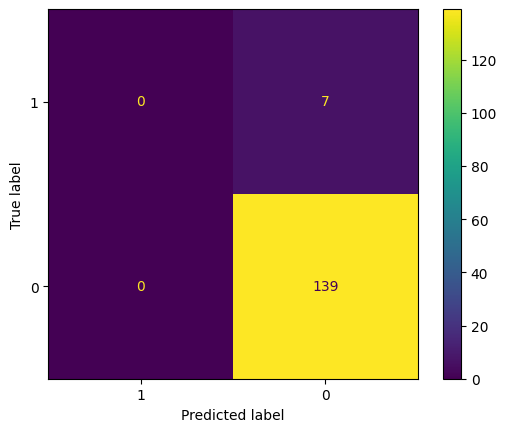

In [117]:
plot1 = ConfusionMatrixDisplay(confusion_matrix=conf_mat1, display_labels=[1,0]).plot();



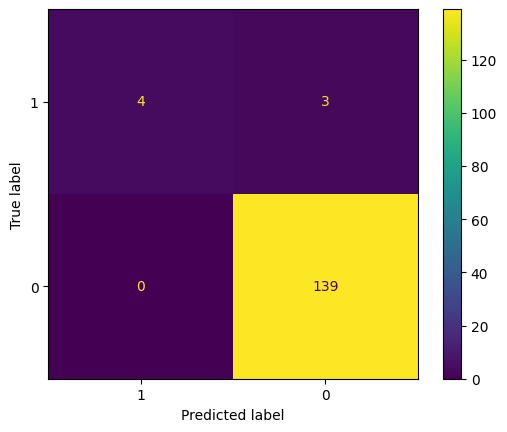

In [118]:
ConfusionMatrixDisplay(confusion_matrix=conf_mat3, display_labels=[1,0]).plot();

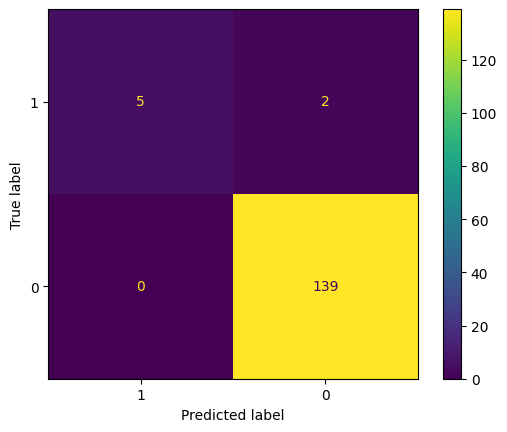

In [119]:
ConfusionMatrixDisplay(confusion_matrix=conf_mat5, display_labels=[1,0]).plot();

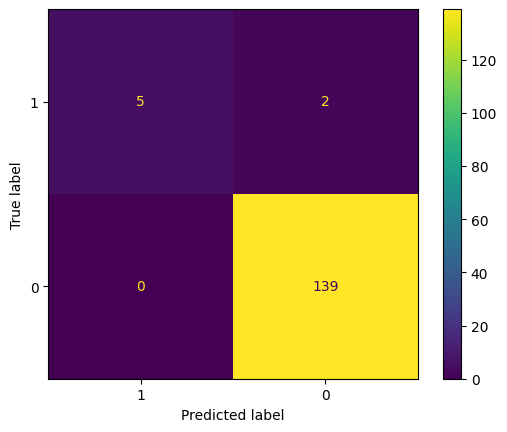

In [120]:
ConfusionMatrixDisplay(confusion_matrix=conf_mat7, display_labels=[1,0]).plot();

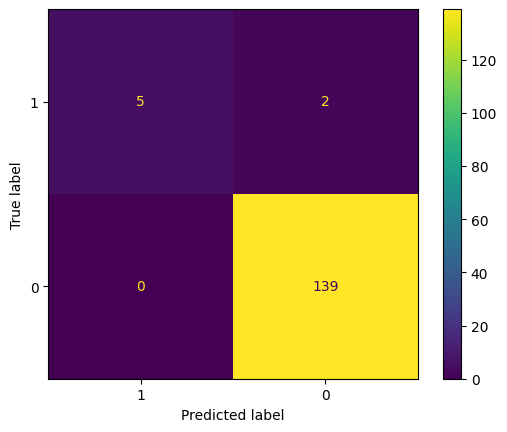

In [121]:
ConfusionMatrixDisplay(confusion_matrix=conf_predictionsht, display_labels=[1,0]).plot();

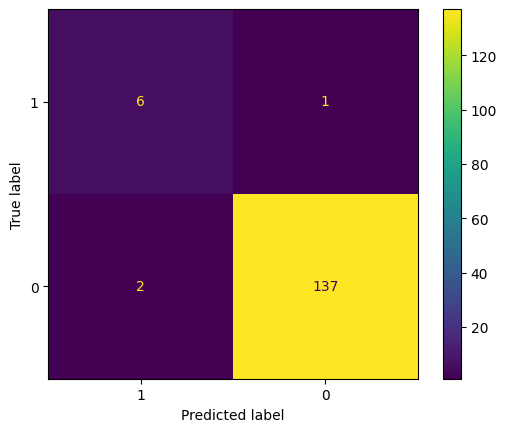

In [122]:
ConfusionMatrixDisplay(confusion_matrix=conf_matlt, display_labels=[1,0]).plot();

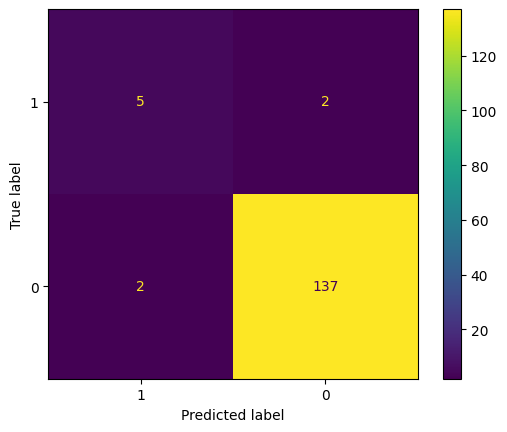

In [123]:
ConfusionMatrixDisplay(confusion_matrix=conf_matxgboost, display_labels=[1,0]).plot();

Visualizing the trees

In [124]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [125]:
print(X_train.shape)
print(y_train.value_counts())

(584, 25)
0    538
1     46
Name: burn, dtype: int64


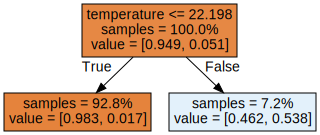

In [126]:
for i in range(1):
    tree = rf1.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X.columns,  
                               filled=True,  
                               max_depth=10, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

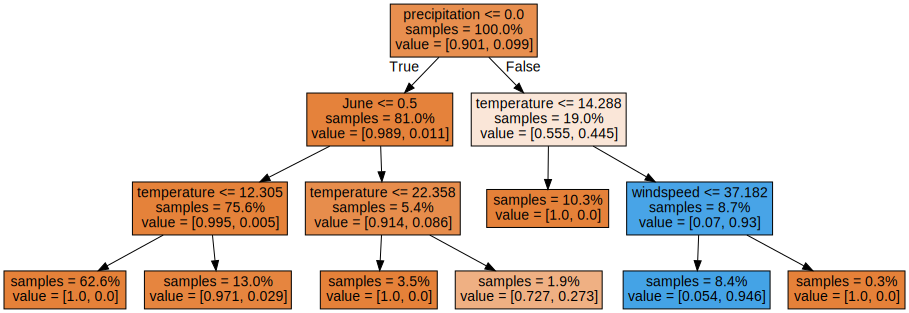

In [127]:
for i in range(1):
    tree = rf3.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X.columns,  
                               filled=True,  
                               max_depth=10, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

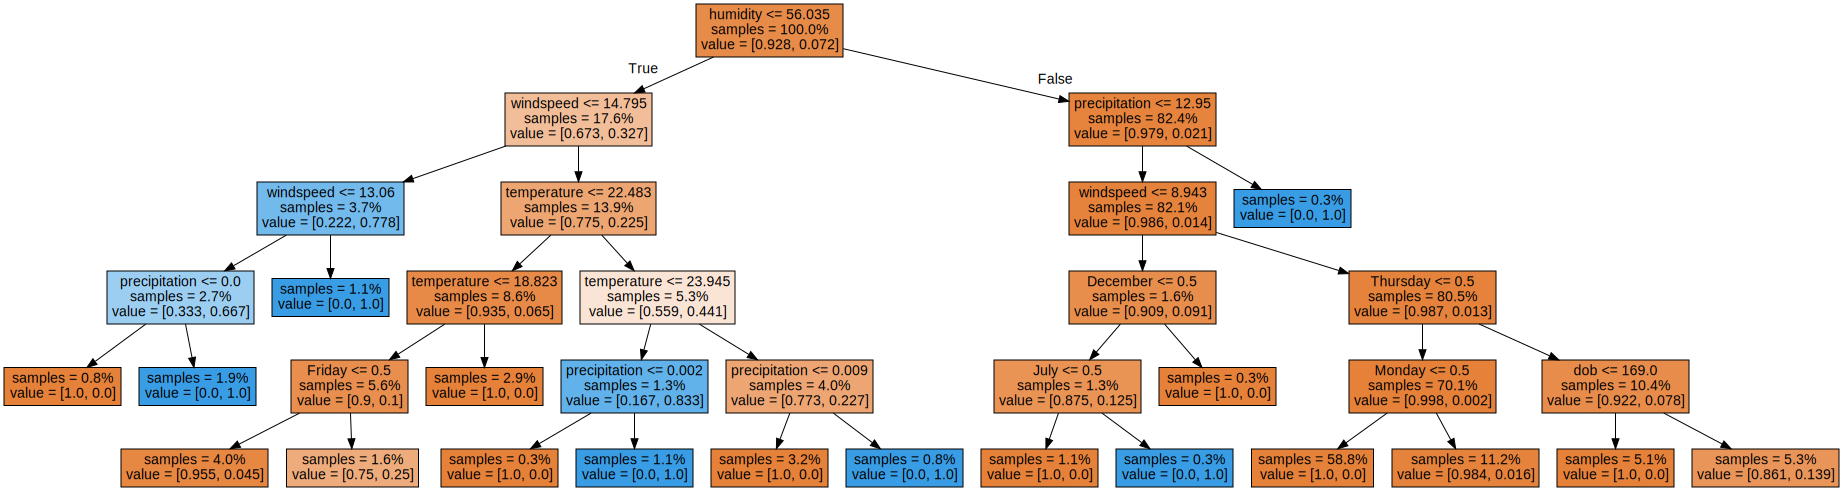

In [128]:

for i in range(1):
    tree = rf5.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X.columns,  
                               filled=True,  
                               max_depth=10, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)
    graph.render(filename="depth5", format='jpg')

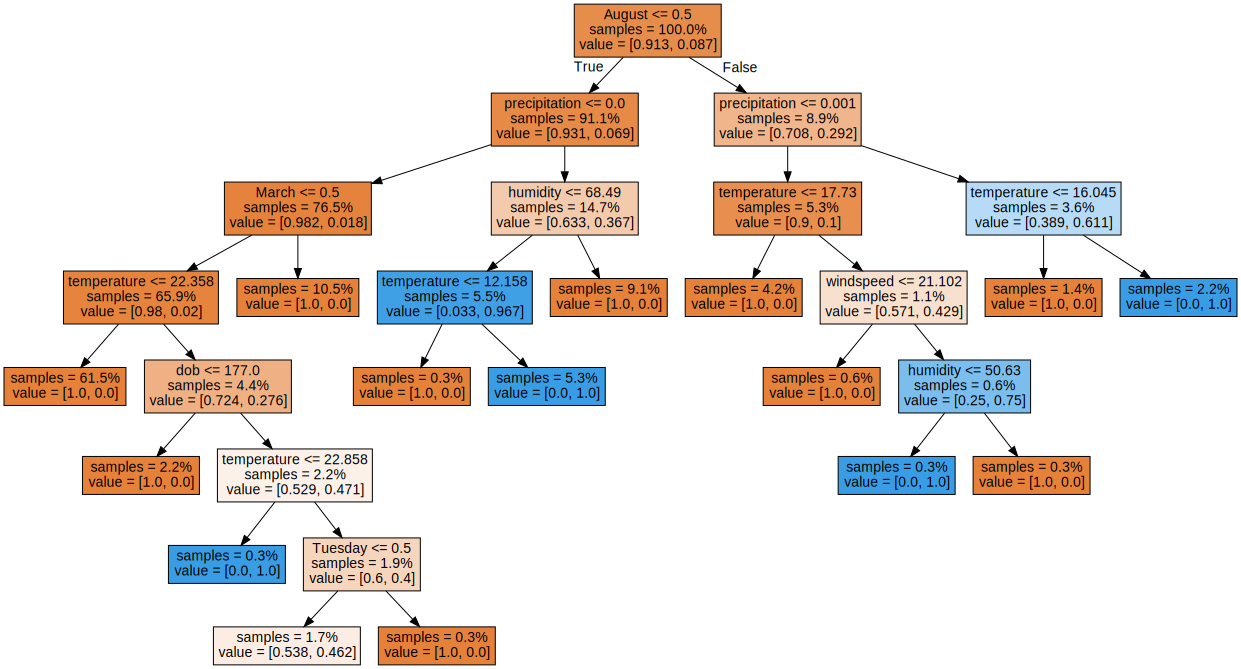

In [129]:
for i in range(1):
    tree = rf7.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X.columns,  
                               filled=True,  
                               max_depth=10, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

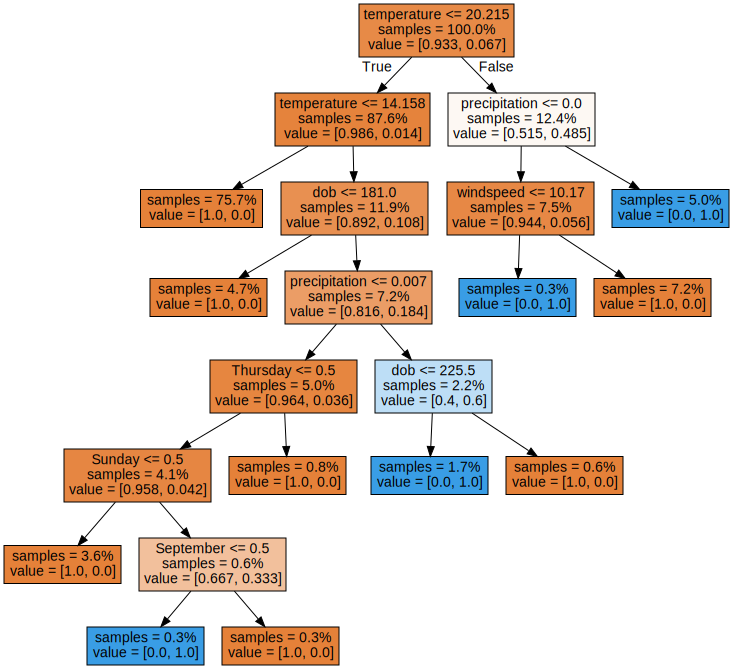

In [130]:
for i in range(1):
    tree = rfht.best_estimator_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X.columns,  
                               filled=True,  
                               max_depth=10, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)
    graph.render(filename="treehypertune", format='jpg')

Add graph showing relation from depth(y) to tp rate, fp rate, tn rate, fn rate

In [131]:
import matplotlib.pyplot as plt

                Depth  True Negatives  False Positives  False Negatives  \
0                   1             139                0                7   
1                   3             139                0                3   
2                   5             139                0                2   
3                   7             139                0                2   
4          Hypertuned             139                0                2   
5  HT Lower threshold             137                2                1   
6             Xgboost             137                2                2   

   True Positives  
0               0  
1               4  
2               5  
3               5  
4               5  
5               6  
6               5  


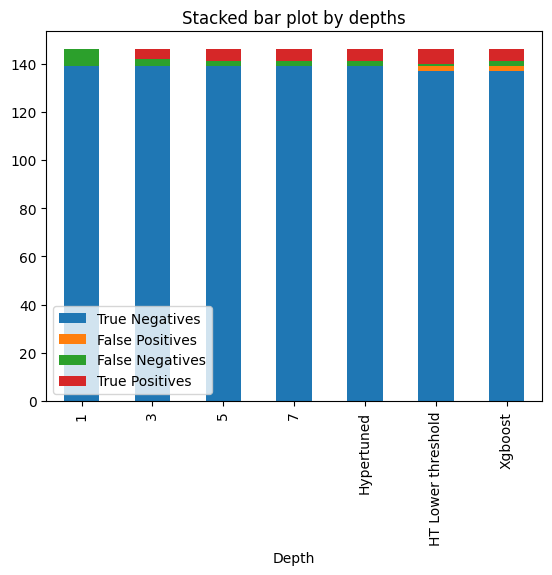

In [132]:
df = pd.DataFrame([['1', conf_mat1[1][1], conf_mat1[1][0], conf_mat1[0][1], conf_mat1[0][0]],  
                   ['3', conf_mat3[1][1], conf_mat3[1][0], conf_mat3[0][1], conf_mat3[0][0]],
                   ['5', conf_mat5[1][1], conf_mat5[1][0], conf_mat5[0][1], conf_mat5[0][0]],
                   ['7', conf_mat7[1][1], conf_mat7[1][0], conf_mat7[0][1], conf_mat7[0][0]],
                   ['Hypertuned', conf_predictionsht[1][1], conf_predictionsht[1][0], conf_predictionsht[0][1], conf_predictionsht[0][0]],
                   ['HT Lower threshold', conf_matlt[1][1], conf_matlt[1][0], conf_matlt[0][1], conf_matlt[0][0]],
                   ['Xgboost', conf_matxgboost[1][1], conf_matxgboost[1][0], conf_matxgboost[0][1], conf_matxgboost[0][0]]],
                  columns=['Depth', 'True Negatives', 'False Positives', 'False Negatives', 'True Positives'])
print(df)
 
df.plot(x='Depth', kind='bar', stacked=True,
        title='Stacked bar plot by depths')
plt.show()